# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# counter = 0
print("Beginning Data Retrieval:")
print("-------------------------")
for city in cities:
    query_url = f'{base_url}appid={weather_api_key}&q={city}'
    weather_response = requests.get(query_url).json()
    try:
        city_id = (weather_response['id'])
        city_name = (weather_response['name'])
        print(f'Processing Record {city_id} \ {city_name}')
    except:
        print("City not found, skipping...")
#     print(json.dumps(weather_response, indent=4, sort_keys=True))
#     counter += 1
#     if counter == 50:
#         break
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval:
-------------------------
Processing Record 1801792 \ Luoyang
Processing Record 3461425 \ Ilhabela
Processing Record 415189 \ Aden
Processing Record 3374333 \ Praia
Processing Record 964432 \ Port Alfred
Processing Record 3833367 \ Ushuaia
Processing Record 2155415 \ New Norfolk
Processing Record 3440777 \ Rocha
Processing Record 2092164 \ Lorengau
Processing Record 2276492 \ Harper
City not found, skipping...
Processing Record 3899539 \ Antofagasta
Processing Record 6167817 \ Torbay
Processing Record 2206939 \ Bluff
Processing Record 293842 \ Kiryat Gat
Processing Record 684822 \ Birchiş
Processing Record 1497210 \ Novoagansk
Processing Record 3899361 \ Arica
Processing Record 3874787 \ Punta Arenas
Processing Record 2022572 \ Khatanga
Processing Record 3893629 \ Coquimbo
Processing Record 380348 \ Abū Zabad
Processing Record 2075265 \ Busselton
Processing Record 2162683 \ Innisfail
Processing Record 5106841 \ Albany
Processing Record 2070998 \ Geraldton
Proc

Processing Record 1701054 \ Marawi
Processing Record 921786 \ Mitsamiouli
Processing Record 1852357 \ Shimoda
Processing Record 3662761 \ Porto Walter
Processing Record 2122090 \ Pevek
Processing Record 3412093 \ Vestmannaeyjar
Processing Record 290030 \ Doha
Processing Record 3516376 \ Tamiahua
Processing Record 569295 \ Cherëmukhovo
Processing Record 6089245 \ Norman Wells
Processing Record 3899695 \ Ancud
Processing Record 408689 \ Lárdos
City not found, skipping...
Processing Record 240210 \ Birao
Processing Record 6111862 \ Port Hardy
Processing Record 2098329 \ Daru
Processing Record 1282898 \ Pokhara
Processing Record 2126123 \ Chokurdakh
Processing Record 3372964 \ Lagoa
Processing Record 2035836 \ Manzhouli
Processing Record 3435038 \ Dolores
Processing Record 3386213 \ Touros
Processing Record 5282297 \ Bethel
Processing Record 3696183 \ Iquitos
Processing Record 2017155 \ Saskylakh
Processing Record 245338 \ Am Timan
Processing Record 2476660 \ Tigzirt
Processing Record 3652

Processing Record 2120612 \ Tigil'
Processing Record 2112309 \ Katsuura
Processing Record 1501690 \ Krutinka
Processing Record 2966839 \ Athlone
Processing Record 897045 \ Solwezi
Processing Record 3939761 \ Hualmay
Processing Record 2653261 \ Cheltenham
Processing Record 3664716 \ Canutama
Processing Record 60019 \ Eyl
Processing Record 2071860 \ Esperance
Processing Record 1524889 \ Chardara
Processing Record 3353383 \ Rundu
Processing Record 2064735 \ Nhulunbuy
Processing Record 5380437 \ Pacific Grove
Processing Record 1253237 \ Verāval
Processing Record 5847411 \ Kahului
Processing Record 2122104 \ Petropavlovsk-Kamchatskiy
Processing Record 1263776 \ Mangan
City not found, skipping...
Processing Record 3137469 \ Sørland
Processing Record 3649959 \ Zamora
City not found, skipping...
Processing Record 778707 \ Mehamn
Processing Record 3374083 \ Bathsheba
Processing Record 5861897 \ Fairbanks
Processing Record 3580477 \ West Bay
Processing Record 1853174 \ Sakaiminato
Processing Rec

In [4]:
weather_response

{'coord': {'lon': 7.3853, 'lat': 18.7369},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 291.35,
  'feels_like': 286.11,
  'temp_min': 291.35,
  'temp_max': 291.35,
  'pressure': 1016,
  'humidity': 25,
  'sea_level': 1016,
  'grnd_level': 967},
 'visibility': 10000,
 'wind': {'speed': 4.23, 'deg': 101},
 'clouds': {'all': 26},
 'dt': 1612484186,
 'sys': {'country': 'NE', 'sunrise': 1612504977, 'sunset': 1612545961},
 'timezone': 3600,
 'id': 2447513,
 'name': 'Arlit',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City": cities})
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""

# counter=0
for index, row in city_df.iterrows():
    query_url = f'{base_url}appid={weather_api_key}&q={city_df["City"][index]}'
    weather_response = requests.get(query_url).json()
    try:
        city_df.loc[index, "Lat"] = weather_response["coord"]["lat"]
        city_df.loc[index, "Lng"] = weather_response["coord"]["lon"]
        city_df.loc[index, "Max Temp"] = weather_response["main"]["temp_max"]
        city_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        city_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        city_df.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]
        city_df.loc[index, "Country"] = weather_response["sys"]["country"]
        city_df.loc[index, "Date"] = weather_response["dt"]
    except:
        city_df.loc[index, "Lat"] = "NaN"
        city_df.loc[index, "Lng"] = "NaN"
        city_df.loc[index, "Max Temp"] = "NaN"
        city_df.loc[index, "Humidity"] = "NaN"
        city_df.loc[index, "Cloudiness"] = "NaN"
        city_df.loc[index, "Wind Speed"] = "NaN"
        city_df.loc[index, "Country"] = "NaN"
        city_df.loc[index, "Date"] = "NaN"
#     counter += 1
#     if counter == 6:
#         break
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luoyang,34.6836,112.454,282.04,99,87,4.03,CN,1612484218
1,ilhabela,-23.7781,-45.3581,299.75,77,29,1.61,BR,1612484108
2,aden,12.7794,45.0367,296.54,70,0,7.35,YE,1612483955
3,praya,14.9215,-23.5087,294.15,73,75,7.2,CV,1612484219
4,port alfred,-33.5906,26.891,292.04,88,16,4.02,ZA,1612484198
...,...,...,...,...,...,...,...,...,...
624,baton rouge,30.4508,-91.1545,292.15,68,90,6.69,US,1612484188
625,port-gentil,-0.7193,8.7815,301.15,89,40,4.12,GA,1612484054
626,samarai,-10.6167,150.667,302.12,68,30,1.09,PG,1612484369
627,dzhusaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
city_df.to_csv("city_weather.csv", encoding="utf-8", index=False)


In [2]:
city_df = pd.read_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----Skip this step if there are no cities that have humidity > 100%. 

In [3]:
clean_city_df = city_df.dropna(axis=0, how='any', inplace=False)
clean_city_df
humid_df = pd.DataFrame({"City": clean_city_df["City"], "Humidity": clean_city_df["Humidity"]})
humid_df.sort_values(by="Humidity", ascending=False)
   


,City,Humidity
361,kabanjahe,100.0
12,torbay,100.0
497,lac du bonnet,100.0
83,bintulu,100.0
84,terrace,100.0
...,...,...
606,djibo,18.0
377,dire,18.0
430,yaan,17.0
239,birao,17.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [4]:
clean_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luoyang,34.6836,112.4536,282.04,99.0,87.0,4.03,CN,1.612484e+09
1,ilhabela,-23.7781,-45.3581,299.75,77.0,29.0,1.61,BR,1.612484e+09
2,aden,12.7794,45.0367,296.54,70.0,0.0,7.35,YE,1.612484e+09
3,praya,14.9215,-23.5087,294.15,73.0,75.0,7.20,CV,1.612484e+09
4,port alfred,-33.5906,26.8910,292.04,88.0,16.0,4.02,ZA,1.612484e+09
...,...,...,...,...,...,...,...,...,...
623,maragheh,37.3917,46.2398,279.15,93.0,90.0,2.06,IR,1.612484e+09
624,baton rouge,30.4508,-91.1545,292.15,68.0,90.0,6.69,US,1.612484e+09
625,port-gentil,-0.7193,8.7815,301.15,89.0,40.0,4.12,GA,1.612484e+09
626,samarai,-10.6167,150.6667,302.12,68.0,30.0,1.09,PG,1.612484e+09


## Latitude vs. Temperature Plot

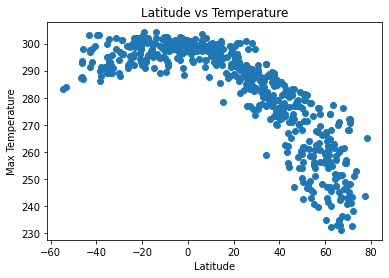

In [9]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs Temperature')
plt.savefig('lat_temp.png', dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

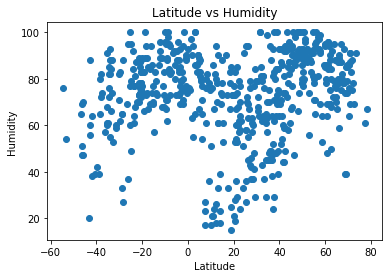

In [10]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.savefig('lat_humidity.png', dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

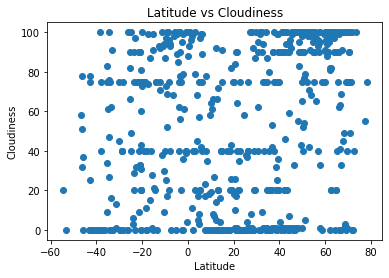

In [11]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.savefig('lat_cloudiness.png', dpi=300, bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

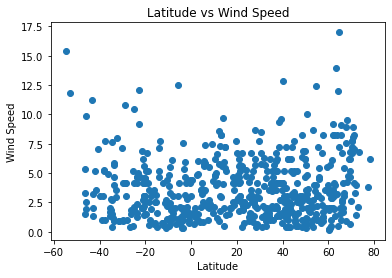

In [12]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.savefig('lat_wind.png', dpi=300, bbox_inches='tight')
plt.show()

## Linear Regression

In [16]:
clean_city_df.head()
north = clean_city_df.loc[(clean_city_df["Lat"]) >0]
south = clean_city_df.loc[(clean_city_df["Lat"]) <0]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ilhabela,-23.7781,-45.3581,299.75,77.0,29.0,1.61,BR,1.612484e+09
4,port alfred,-33.5906,26.8910,292.04,88.0,16.0,4.02,ZA,1.612484e+09
5,ushuaia,-54.8000,-68.3000,283.15,76.0,20.0,15.43,AR,1.612484e+09
6,new norfolk,-42.7826,147.0587,297.59,56.0,78.0,1.34,AU,1.612484e+09
7,rocha,-34.4833,-54.3333,292.22,76.0,100.0,7.69,UY,1.612484e+09
...,...,...,...,...,...,...,...,...,...
613,yurimaguas,-5.9000,-76.0833,297.94,92.0,98.0,1.09,PE,1.612484e+09
619,olinda,-8.0089,-34.8553,299.15,73.0,40.0,3.09,BR,1.612484e+09
621,alice springs,-23.7000,133.8833,296.15,64.0,75.0,4.63,AU,1.612484e+09
625,port-gentil,-0.7193,8.7815,301.15,89.0,40.0,4.12,GA,1.612484e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

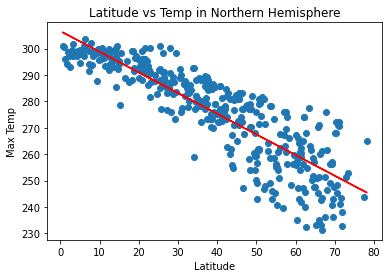

In [19]:
x_values1 = north['Lat']
y_values1 = north['Max Temp']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
plt.scatter(x_values1,y_values1)
plt.plot(x_values1,regress_values1,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Temp in Northern Hemisphere')
plt.savefig('north_temp.png', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

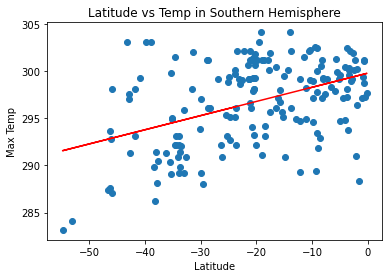

In [20]:
x_values2 = south['Lat']
y_values2 = south['Max Temp']
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope2 + intercept2
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Temp in Southern Hemisphere')
plt.savefig('south_temp.png', dpi=300, bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

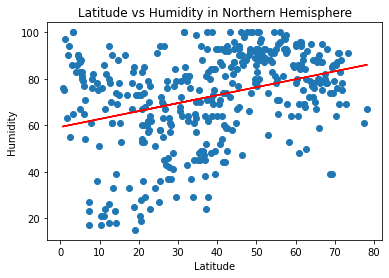

In [21]:
x_values3 = north['Lat']
y_values3 = north['Humidity']
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope3 + intercept3
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.savefig('north_humidity.png', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

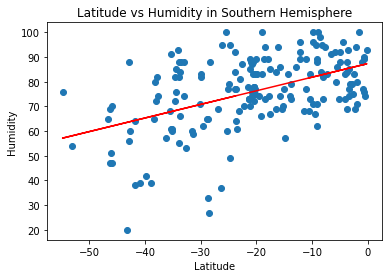

In [22]:
x_values4 = south['Lat']
y_values4 = south['Humidity']
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope4 + intercept4
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.savefig('south_humidity.png', dpi=300, bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

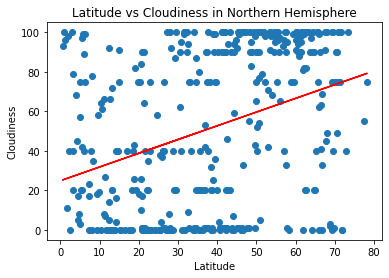

In [23]:
x_values5 = north['Lat']
y_values5 = north['Cloudiness']
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope5 + intercept5
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.savefig('north_cloudiness.png', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

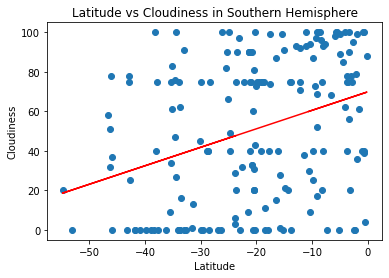

In [24]:
x_values6 = south['Lat']
y_values6 = south['Cloudiness']
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope6 + intercept6
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.savefig('south_cloudiness.png', dpi=300, bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

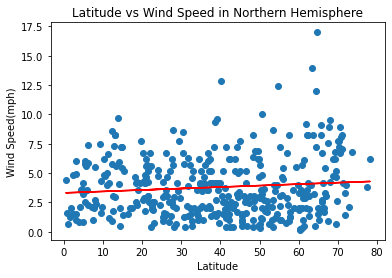

In [27]:
x_values7 = north['Lat']
y_values7 = north['Wind Speed']
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope7 + intercept7
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Latitude vs Wind Speed in Northern Hemisphere')
plt.savefig('north_wind.png', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

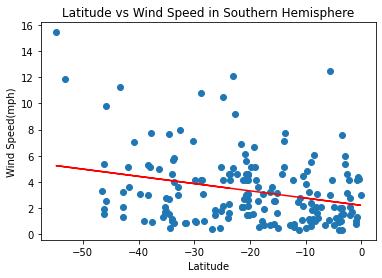

In [26]:
x_values8 = south['Lat']
y_values8 = south['Wind Speed']
(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope8 + intercept8
plt.scatter(x_values8,y_values8)
plt.plot(x_values8,regress_values8,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Latitude vs Wind Speed in Southern Hemisphere')
plt.savefig('south_wind.png', dpi=300, bbox_inches='tight')
plt.show()